In [ ]:
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
%matplotlib inline

In [ ]:
c=[100,0,0,1,2,1,3,1,0,10,1] # Cost to visit. Stage cost is c(s,a)=c(s)
N=len(c)
lam=.9 # Discount Factor
actions=[-1,1]  # allowed actions = left or right

In [ ]:
Q=np.zeros((N,2))

In place Q-Learning first. This is the gold standard!

In [ ]:
for _ in range(1000):
    x=np.random.randint(N)
    a=np.random.randint(2)
    xnext=(x+actions[a]) % N
    Q[x,a]=c[x]+lam*min(Q[xnext,:])

print(np.transpose(Q),x,a)
policy=[int(Q[k,0]>Q[k,1]) for k in range(11)]
print(policy)
Qopt=Q
policy_opt=policy

[[119. 100.   0.   1.   3.   4.   7.   8.   8.  18.  19.]
 [100.   0.   1.   4.   6.   8.  11.   9.  18.  29. 101.]] 3 0
[1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]


Q-Learning with $\epsilon$-greedy action selection. Converges almost as quickly to the optimal solution, but exploration gives poor returns.

In [ ]:
Q=np.zeros((N,2))
α=1 #learning rate
M=100
x0=0

[[112.45315789  90.           0.           1.           2.9
    3.61         6.249        6.6241       4.73684211  14.26315789
   13.83684211]
 [100.           0.           0.9          3.61         5.249
    4.51         7.059        5.26315789  12.83684211  19.729
   91.        ]]
[1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0]


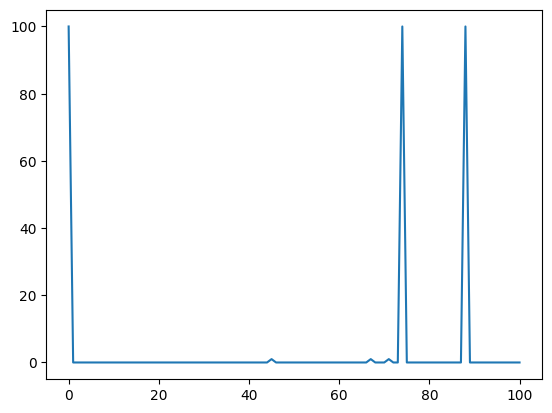

In [ ]:
for _ in range(100):
  x=x0
  if np.random.rand()>0.1:
    a=np.argmin(Q[x,:])
  else:
    a=np.random.randint(2)
  cost=[c[x]]

  for _ in range(M):
    xnext=(x+actions[a]) % N
    Q[x,a]=(1-α)*Q[x,a]+α*(c[x]+lam*min(Q[xnext,:]))
    x=xnext
    if np.random.rand()>0.1:
      a=np.argmin(Q[x,:])
    else:
      a=np.random.randint(2)
    cost.append(c[x])

plt.plot(cost)
print(np.transpose(Q))
policy=[int(Q[k,0]>Q[k,1]) for k in range(11)]
print(policy)



SARSA with  𝜖-greedy action selection. Converges slowly to a suboptimal solution with good returns.

In [ ]:
Q=np.zeros((N,2))
α=.01 #learning rate
M=100
x0=0


[[137.8537441  134.16303309  19.53051468   5.47089732  87.49310388
   15.04133439  74.71398158  40.20613638  19.04201209  18.58134896
   46.84303767]
 [108.80302757  11.8961095    4.96766368  14.7565156   17.65027903
   19.30773536  26.32565121  74.66775406  13.02558909 100.62040065
  101.29738973]]
[1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0]


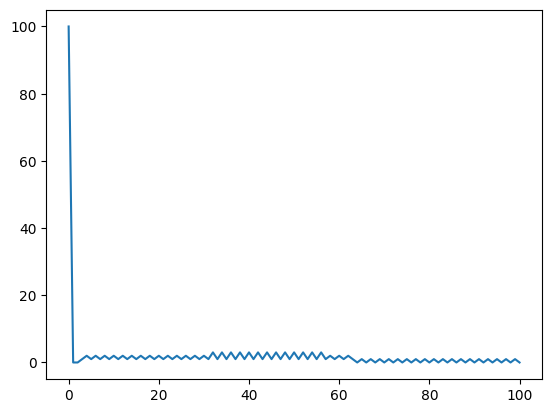

In [ ]:
for _ in range(10000):
  x=x0
  if np.random.rand()>0.1:
    a=np.argmin(Q[x,:])
  else:
    a=np.random.randint(2)
  cost=[c[x]]
  for _ in range(M):
    xnext=(x+actions[a]) % N
    if np.random.rand()>0.1:
      anext=np.argmin(Q[xnext,:])
    else:
      anext=np.random.randint(2)
    Q[x,a]=(1-α)*Q[x,a]+α*(c[x]+lam*Q[xnext,anext])
    x=xnext
    a=anext
    cost.append(c[x])

plt.plot(cost)

print(np.transpose(Q))
policy=[int(Q[k,0]>Q[k,1]) for k in range(11)]
print(policy)


Expected SARSA (aka Q-Learning with $\epsilon$-random transitions)

In [ ]:
Q=np.zeros((N,2))
α=1 #learning rate
M=100
x0=0
eps=0.1

In [ ]:
for _ in range(100):
  x=x0
  if np.random.rand()>eps:
    a=np.argmin(Q[x,:])
  else:
    a=np.random.randint(2)

  for _ in range(M):
    xnext=(x+actions[a]) % N
    Q[x,a]=(1-α)*Q[x,a]+α*(c[x]+lam*((1-eps)*min(Q[xnext,:])+eps/2*Q[xnext,0]+eps/2*Q[xnext,1]))
    x=xnext
    if np.random.rand()>eps:
      a=np.argmin(Q[x,:])
    else:
      a=np.random.randint(2)

print(np.transpose(Q))
policy=[int(Q[k,0]>Q[k,1]) for k in range(11)]
print(policy)


Monte Carlo Exporing Starts (First visit version)

In [ ]:
M=100
Nvisits=np.zeros((N,2))
Q=np.zeros((N,2))

In [ ]:
for _ in range(1000):
  x=[np.random.randint(N)]
  a=[np.random.randint(2)]
  C=[]
  Visited=np.zeros((N,2))
  while len(x)<M:
    C.append(c[x[-1]])
    x.append((x[-1]+actions[a[-1]]) % N)
    a.append(np.argmin(Q[x[-1],:]))
  for k in range(len(C)-1,0,-1):
    C[k-1]+=lam*C[k]
  for k in range(0,len(C)):
    if not Visited[x[k],a[k]]:
      Nvisits[x[k],a[k]]+=1
      α=1/Nvisits[x[k],a[k]]
      Q[x[k],a[k]]=(1-α)*Q[x[k],a[k]]+α*C[k]
      Visited[x[k],a[k]]=1
print(np.transpose(Q))
policy=[int(Q[k,0]>Q[k,1]) for k in range(11)]
print(policy)



